1.Import needed librarires<br>
2.Import Dataset<br>
3.Biforcate the dataset<br>
4.Visualize the dataset<br>
5.Train the dataset<br>
5.test the dataset<br>
6.Predict the dataset<br>

Build a model -> fit a model ->evaluate it ->tweak a model -> fit it -> evaluate it ->tweak a model ->fit it -> evaluate it....

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import os
import matplotlib.pyplot as plt


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_X, train_Y), (test_x,test_y ) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_X.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#scaling the data from 0.0 to 1.0
train_X = train_X /255
test_X= train_Y/255

In [ ]:
#reshaping the model
train_X = train_X.reshape(train_X.shape[0],28,28,1)
test_x = test_x.reshape(test_x.shape[0],28,28,1)

In [ ]:
print(train_X.shape)
print(test_x.shape)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#creating a model
model = keras.Sequential([
                          keras.layers.Conv2D(input_shape = [28,28,1],filters=5,kernel_size=3,strides = 1,activation='relu',name='Conv1'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(10,name='dense')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 5)         50        
_________________________________________________________________
flatten (Flatten)            (None, 3380)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                33810     
Total params: 33,860
Trainable params: 33,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
testing = False
epochs = 5

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
               metrics=[keras.metrics.SparseCategoricalAccuracy()
               ])
model.fit(train_X,train_Y,epochs=epochs)
test_loss, test_acc = model.evaluate(test_x, test_y)
print('\nTest accuracy: {}'.format(test_acc))

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 2.4162 - sparse_categorical_accuracy: 0.1869
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 2.3005 - sparse_categorical_accuracy: 0.1781
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1199
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1204
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1316

Test accuracy: 0.1316000074148178


Evaluating a Model

In [ ]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X +10

In [ ]:
X_train = X[:40] #first 40
X_test = X[40: ]# last 40

y_train = y[:40] #first 40
y_test = y[40: ]# last 40

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

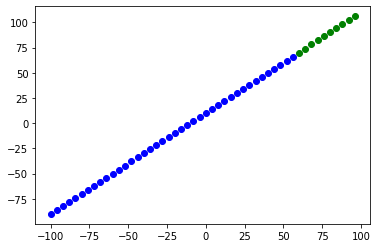

In [ ]:
plt.scatter(X_train,y_train,c='b',label = 'trainig data')
plt.scatter(X_test,y_test,c='g',label = 'testing data')

In [ ]:
X_train.shape

TensorShape([40])

In [ ]:
## Build a neural network for our data

#1.create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model.fit(X_train,y_train,epochs= 5)

Epoch 1/5
2/2 [==============================] - 0s 5ms/step - loss: 11.3852 - mae: 11.3852
Epoch 2/5
2/2 [==============================] - 0s 4ms/step - loss: 13.4858 - mae: 13.4858
Epoch 3/5
2/2 [==============================] - 0s 5ms/step - loss: 16.0176 - mae: 16.0176
Epoch 4/5
2/2 [==============================] - 0s 4ms/step - loss: 11.8879 - mae: 11.8879
Epoch 5/5
2/2 [==============================] - 0s 6ms/step - loss: 11.2742 - mae: 11.2742


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy: {}'.format(test_acc))

1/1 [==============================] - 0s 80ms/step - loss: 20.4895 - mae: 20.4895

Test accuracy: 20.489521026611328


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


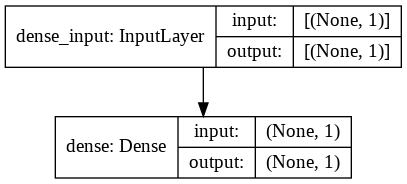

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[51.945705],
       [55.404545],
       [58.863384],
       [62.322224],
       [65.78106 ],
       [69.2399  ],
       [72.69874 ],
       [76.15758 ],
       [79.61642 ],
       [83.07526 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

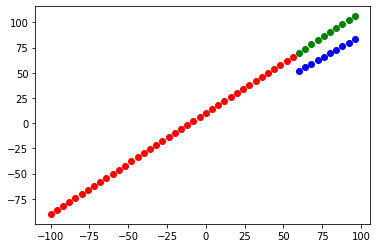

In [ ]:
plt.scatter(X_train,y_train,c='r')
plt.scatter(X_test,y_test,c='g')
plt.scatter(X_test,y_pred,c='b')

## Evaluating model with regression evaluation metrics

* MAE - mean absolute error
* MSE - mean squared error

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 15ms/step - loss: 20.4895 - mae: 20.4895


[20.489521026611328, 20.489521026611328]

In [ ]:
tf.keras.losses.MAE(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([36.054295, 32.595455, 29.136616, 25.677776, 22.21894 , 18.760101,
       15.841009, 13.505453, 11.753433, 10.584949], dtype=float32)>

In [ ]:
y_pred=tf.squeeze(y_pred)


In [ ]:
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=20.489521>

In [ ]:
mse = tf.metrics.mean_squared_error(y_test,y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=422.23642>

In [ ]:
#Set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                                   tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss:

In [ ]:
model_1.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred_1 = model_1.predict(X_test)


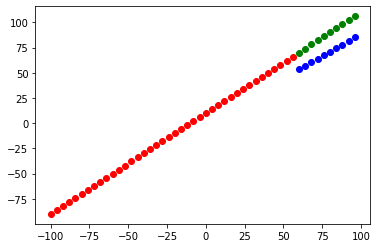

In [ ]:
plt.scatter(X_train,y_train,c='r')
plt.scatter(X_test,y_test,c='g')
plt.scatter(X_test,y_pred_1,c='b')

In [ ]:
def mae(y_test,y_pred):
  return  tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
def mse(y_test,y_pred):
  return  tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
print(mae(y_test,y_pred_1))
print(mse(y_test,y_pred_1))

tf.Tensor(18.745327, shape=(), dtype=float32)
tf.Tensor(353.57336, shape=(), dtype=float32)
